In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import operator

In [2]:
#В этом задании вам предлагается построить алгоритм, предсказывающий является ли объект потенциально интересным в 
#зависимости от его параметров.
#Предоставляется файл data.csv со всей нужной для построения алгоритма информацией. 
#Необходимо самостоятельно разбить файл на обучающую/тестовую выборку и сделать классификатор. 
#Некоторые параметры могут быть избыточными и негативно влиять на возможность создания качественной модели.
data = pd.read_csv("round_2.csv")

In [3]:
data.head(1)

,p,target,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16
0,1,no,0,0,0,0.0,0,1,0,0.5897,17,2,0,1,1,0,0,1,0.4103


In [4]:
data.drop(["p"], axis = 1, inplace = True)
data["target"] = data["target"].map({"no": 0, "yes":1})
data.head(1)

,target,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16
0,0,0,0,0,0.0,0,1,0,0.5897,17,2,0,1,1,0,0,1,0.4103


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
target    1048575 non-null int64
f0        1048575 non-null int64
f1        1048575 non-null int64
f2        1048575 non-null int64
f3        1048575 non-null float64
f4        1048575 non-null int64
f5        1048575 non-null int64
f6        1048575 non-null int64
f7        1048575 non-null float64
f8        1048575 non-null int64
f9        1048575 non-null int64
f10       1048575 non-null int64
f11       1048575 non-null int64
f12       1048575 non-null int64
f13       1048575 non-null int64
f14       1048575 non-null int64
f15       1048575 non-null int64
f16       1048575 non-null float64
dtypes: float64(3), int64(15)
memory usage: 144.0 MB


In [6]:
data.describe()

,target,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.693060e-02,8.502349e+00,9.192504e-01,1.570074e-01,5.185007e-01,1.380902e+00,1.245282e+00,4.221103e+00,7.431517e-01,1.248270e+01,3.393593e+00,9.298683e+00,7.208030e-01,7.208059e-01,1.483580e+00,2.300152e+00,2.164533e+00,2.568483e-01
std,1.290115e-01,3.085617e+01,2.447030e+00,2.230556e+00,4.189593e-01,1.201584e+01,5.783590e-01,1.179580e+01,2.304141e-01,1.322067e+01,2.122728e+00,3.241057e+01,4.486048e-01,4.486034e-01,2.537598e+00,1.346567e+01,2.512940e+00,2.304141e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.766800e-01,6.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.134000e-02
50%,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,6.153846e-01,0.000000e+00,1.000000e+00,0.000000e+00,7.961100e-01,9.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.038900e-01
75%,0.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,9.666667e-01,1.000000e+00,1.000000e+00,4.000000e+00,9.486600e-01,1.400000e+01,6.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,4.233200e-01
max,1.000000e+00,2.550000e+02,2.550000e+02,2.550000e+02,1.000000e+00,2.550000e+02,8.000000e+00,2.550000e+02,1.000000e+00,2.380000e+02,7.000000e+00,2.550000e+02,1.000000e+00,1.000000e+00,2.550000e+02,5.100000e+02,2.560000e+02,1.000000e+00


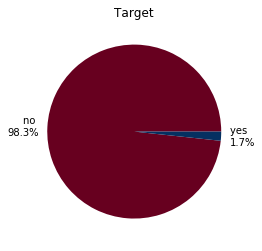

In [7]:
freq_y = len(data[data['target'] == 1]) / len(data)
freq_n = len(data[data['target'] == 0]) / len(data)
series = pd.Series([freq_n, freq_y], index = ['no \n{:.1%}'.format(freq_n), 'yes \n{:.1%}'.format(freq_y)] ,name = 'target')
series.plot(kind = 'pie', colormap = 'RdBu', label = '', title = 'Target')
plt.show()

In [8]:
# We seem major disbalance here, so our metrics should be f1-score
# Lets plot data

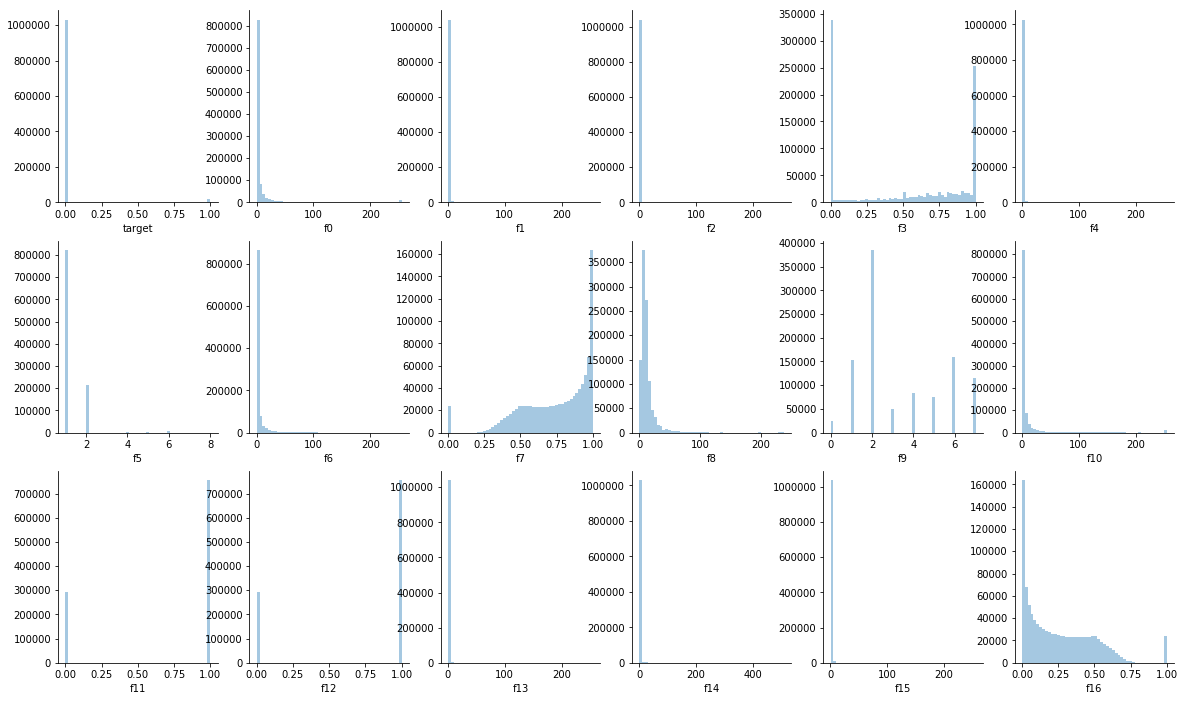

In [9]:
fig, ax = plt.subplots(nrows = 3, ncols = 6, figsize = (20,12))
for i in range(len(data.columns)):
    sns.distplot(data.iloc[:,i], kde = False, bins = 50, ax = ax[i // 6, i % 6])
    sns.despine()

c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


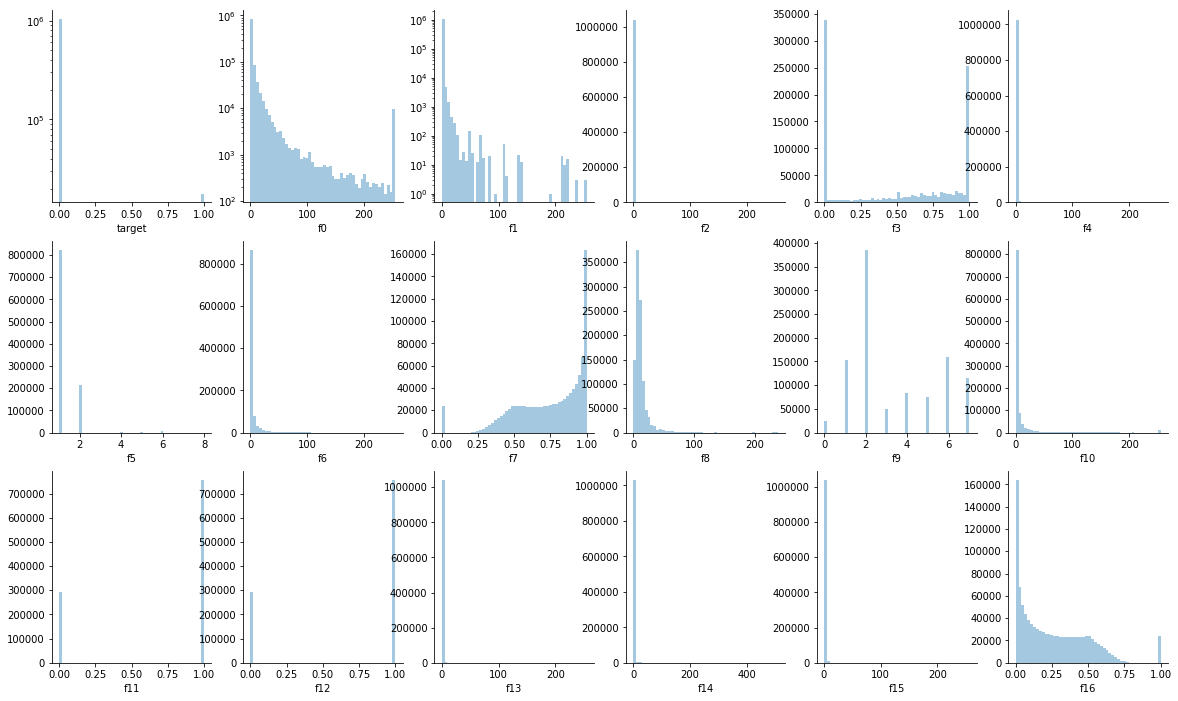

In [10]:
# Maybe we need to use log scale
fig, ax = plt.subplots(nrows = 3, ncols = 6, figsize = (20,12))
for i in range(len(ax)):
    ax[i // 6, i % 6].set(yscale = 'log') #sets y axis to log scale
for i in range(len(data.columns)):
    sns.distplot(data.iloc[:,i], kde = False, bins = 50, ax = ax[i // 6, i % 6])
    sns.despine()

In [11]:
# We see that f7 and f16 may have dependence f7 = 1 - f16. Lets check it
data[["f7", "f16"]].corr()

,f7,f16
f7,1.0,-1.0
f16,-1.0,1.0


In [12]:
# Yes. So we drop f16 because it does not give any additional information. Also we drop f7 because it`s fake column as
# distribution does not seem to be real data.
# In the description to this dataset was said that there are some fake (generated) columns
data.drop(["f16","f7"], axis = 1, inplace = True)

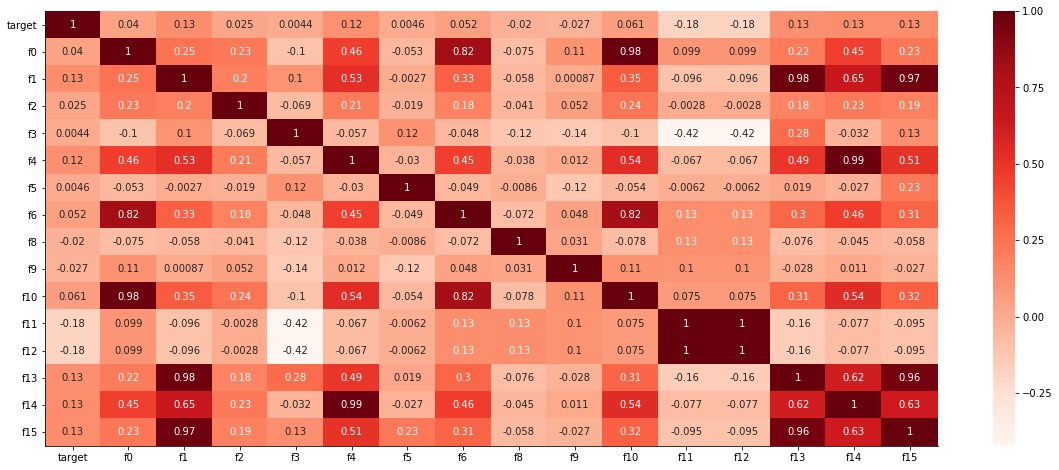

In [13]:
# In this case lets check the corr matrix
fig, ax = plt.subplots(figsize = (20,8))
sns.heatmap(data.corr(), cmap = 'Reds', annot = True, ax = ax)
sns.despine()

In [14]:
# corr(F11, F12) = 1
data.drop("f12", axis = 1, inplace = True)

c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


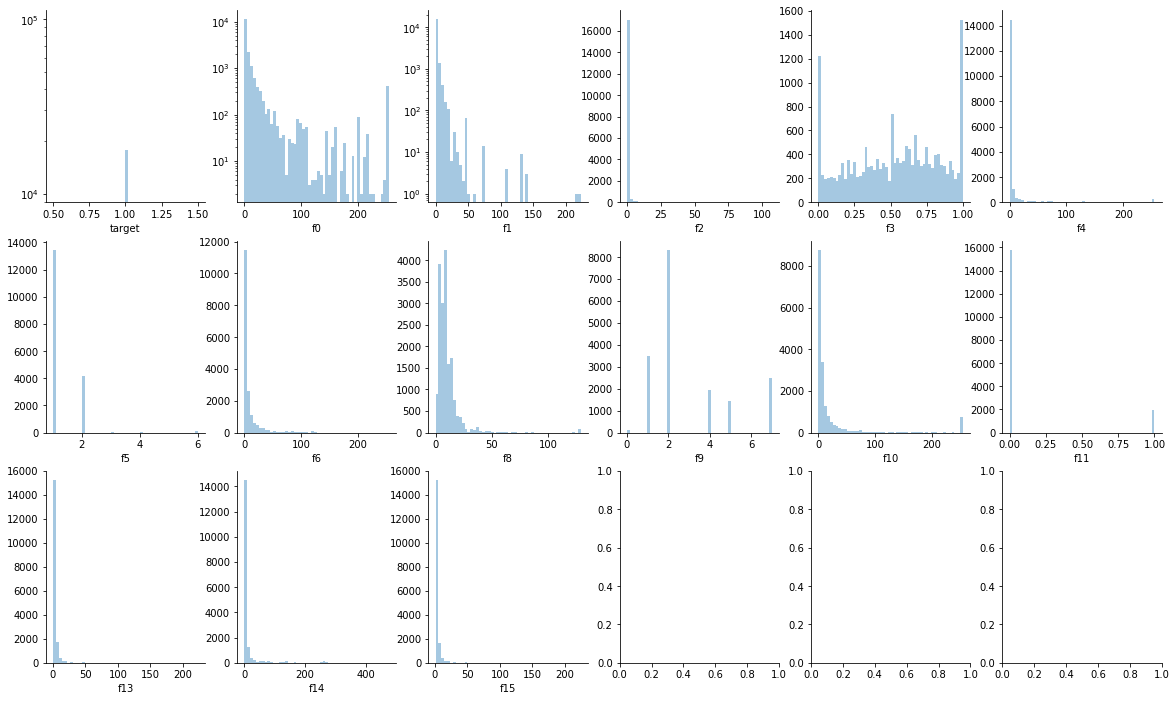

In [15]:
# Lets see the distribution for positive samples
fig, ax = plt.subplots(nrows = 3, ncols = 6, figsize = (20,12))
for i in range(len(ax)):
    ax[i // 6, i % 6].set(yscale = 'log') #sets y axis to log scale
for i in range(len(data.columns)):
    sns.distplot(data[data["target"] == 1].iloc[:,i], kde = False, bins = 50, ax = ax[i // 6, i % 6])
    sns.despine()

In [16]:
# From comparison we see that f3 is very important, because it`s distibution different from general distribution for 
# f3. Also f9 cuz positive do not have f9 = 3 or 6, for the same reason f5 <= 6 for positive classes
# and also f14, f11. We will note that later in model training

In [17]:
# From plot and dataset describe we see that there are columns with range [0,255]. Seems like it`s pixels.
# Lets try to visualise
columns_pixels = [col for col in data.columns if (max(data[col]) > 10) & (max(data[col]) < 400)]

In [18]:
pictures_negative = [pict.reshape(3,3) for pict in np.array(data[data["target"]==0][columns_pixels])]
pictures_positive = [pict.reshape(3,3) for pict in np.array(data[data["target"]==1][columns_pixels])]

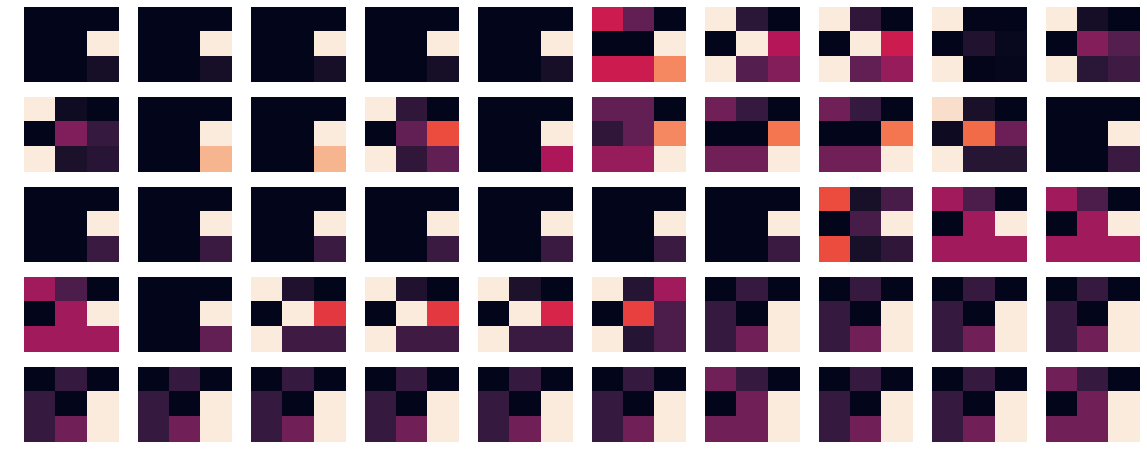

In [19]:
# Negative samples
fig, ax = plt.subplots(nrows = 5, ncols = 10, figsize = (20,8))
for i in range(len(pictures_negative)): 
    axi = ax[i // 10, i % 10]
    axi.axis('off')
    sns.heatmap(pictures_negative[i], ax = axi, cbar = 0)
    sns.axes_style()
    sns.despine()
    if i >=49:
        break

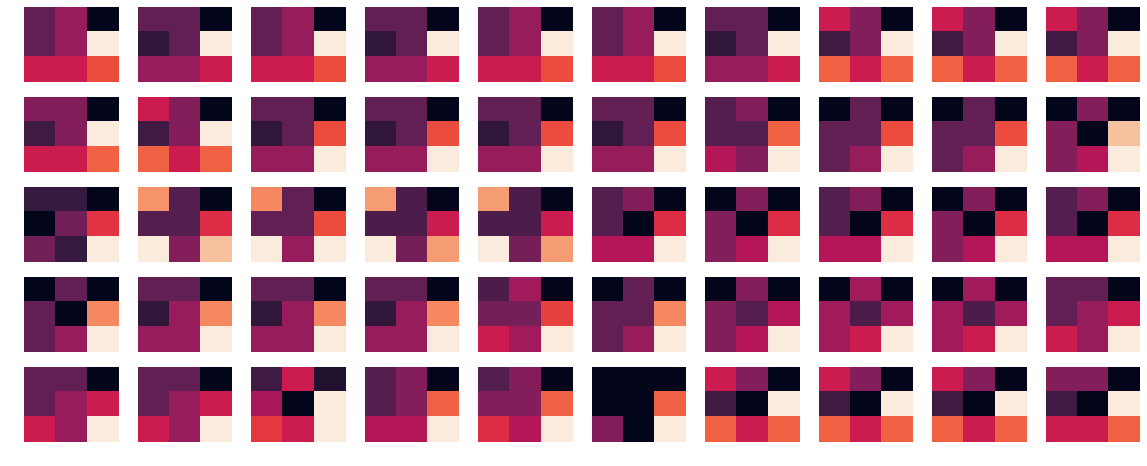

In [20]:
# Positive samples
fig, ax = plt.subplots(nrows = 5, ncols = 10, figsize = (20,8))
for i in range(len(pictures_positive)): 
    axi = ax[i // 10, i % 10]
    axi.axis('off')
    sns.heatmap(pictures_positive[i], ax = axi, cbar = 0)
    sns.axes_style()
    sns.despine()
    if i >=49:
        break

In [21]:
# Seems like these columns is not enough to classify, but still we can see that positive class has more intense pictures.
# Also we can see that there are a lot of duplicate pictures. Duplicates in dataset?
# lets try to model it with LR and tree
zoo = [(LogisticRegression(), "LR"),(DecisionTreeClassifier(max_depth = 10), "Tree")]
def zoo_score(train, zoo):
    X,y = train.iloc[:,1:], train.iloc[:,0]
    for clf, name in zoo:
        print(name, ": ", np.mean(cross_val_score(clf, X, y, cv = 4, scoring = "f1")))

In [22]:
columns = ["target"]
for el in columns_pixels:
    columns.append(el)

In [23]:
zoo_score(data[columns], zoo)

c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR :  0.011533380008338874
Tree :  0.18842286461866908


In [24]:
# Now it is obvious that these columns are not enough. From previous analysys
# we rember that f3, f5, f9, f11, f14 are super important. Lets see
columns.append("f3")
columns.append("f5")
columns.append("f9")
columns.append("f11")
columns.append("f14")
zoo = [(DecisionTreeClassifier(max_depth = 10), "Tree")]
zoo_score(data[columns], zoo)

Tree :  0.7566772049824871


In [25]:
# Maybe we dont even need pixels? 
zoo_score(data[["target", "f3", "f5", "f9", "f11", "f14"]], zoo)

Tree :  0.7271452258790088


In [26]:
# Pixels does not give so much. 

In [27]:
# From previuos analysis we noticed that there can be some duplicates. Lets remove them
data_original = data.copy()
print("Before removing duplicates:", len(data["target"]))
data.drop_duplicates(inplace = True)
print("After removing duplicates:", len(data["target"]))

Before removing duplicates: 1048575
After removing duplicates: 240363


In [28]:
# Not so bad. Lets check if disbalance reduced.
Counter(data["target"])

Counter({0: 227388, 1: 12975})

In [29]:
# Now it is not 1.7%. Lets build simple tree
zoo = [(DecisionTreeClassifier(max_depth = 10), "Tree")]
zoo_score(data[["target", "f3", "f5", "f9", "f11", "f14"]], zoo)

Tree :  0.7459740924768292


In [30]:
# We got improvement by getting more score and also reducing data size in 9 times. Also we use only 4 features.
# What if we use all features? 
zoo_score(data, zoo)

Tree :  0.7433096306183758


C:\Users\beda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


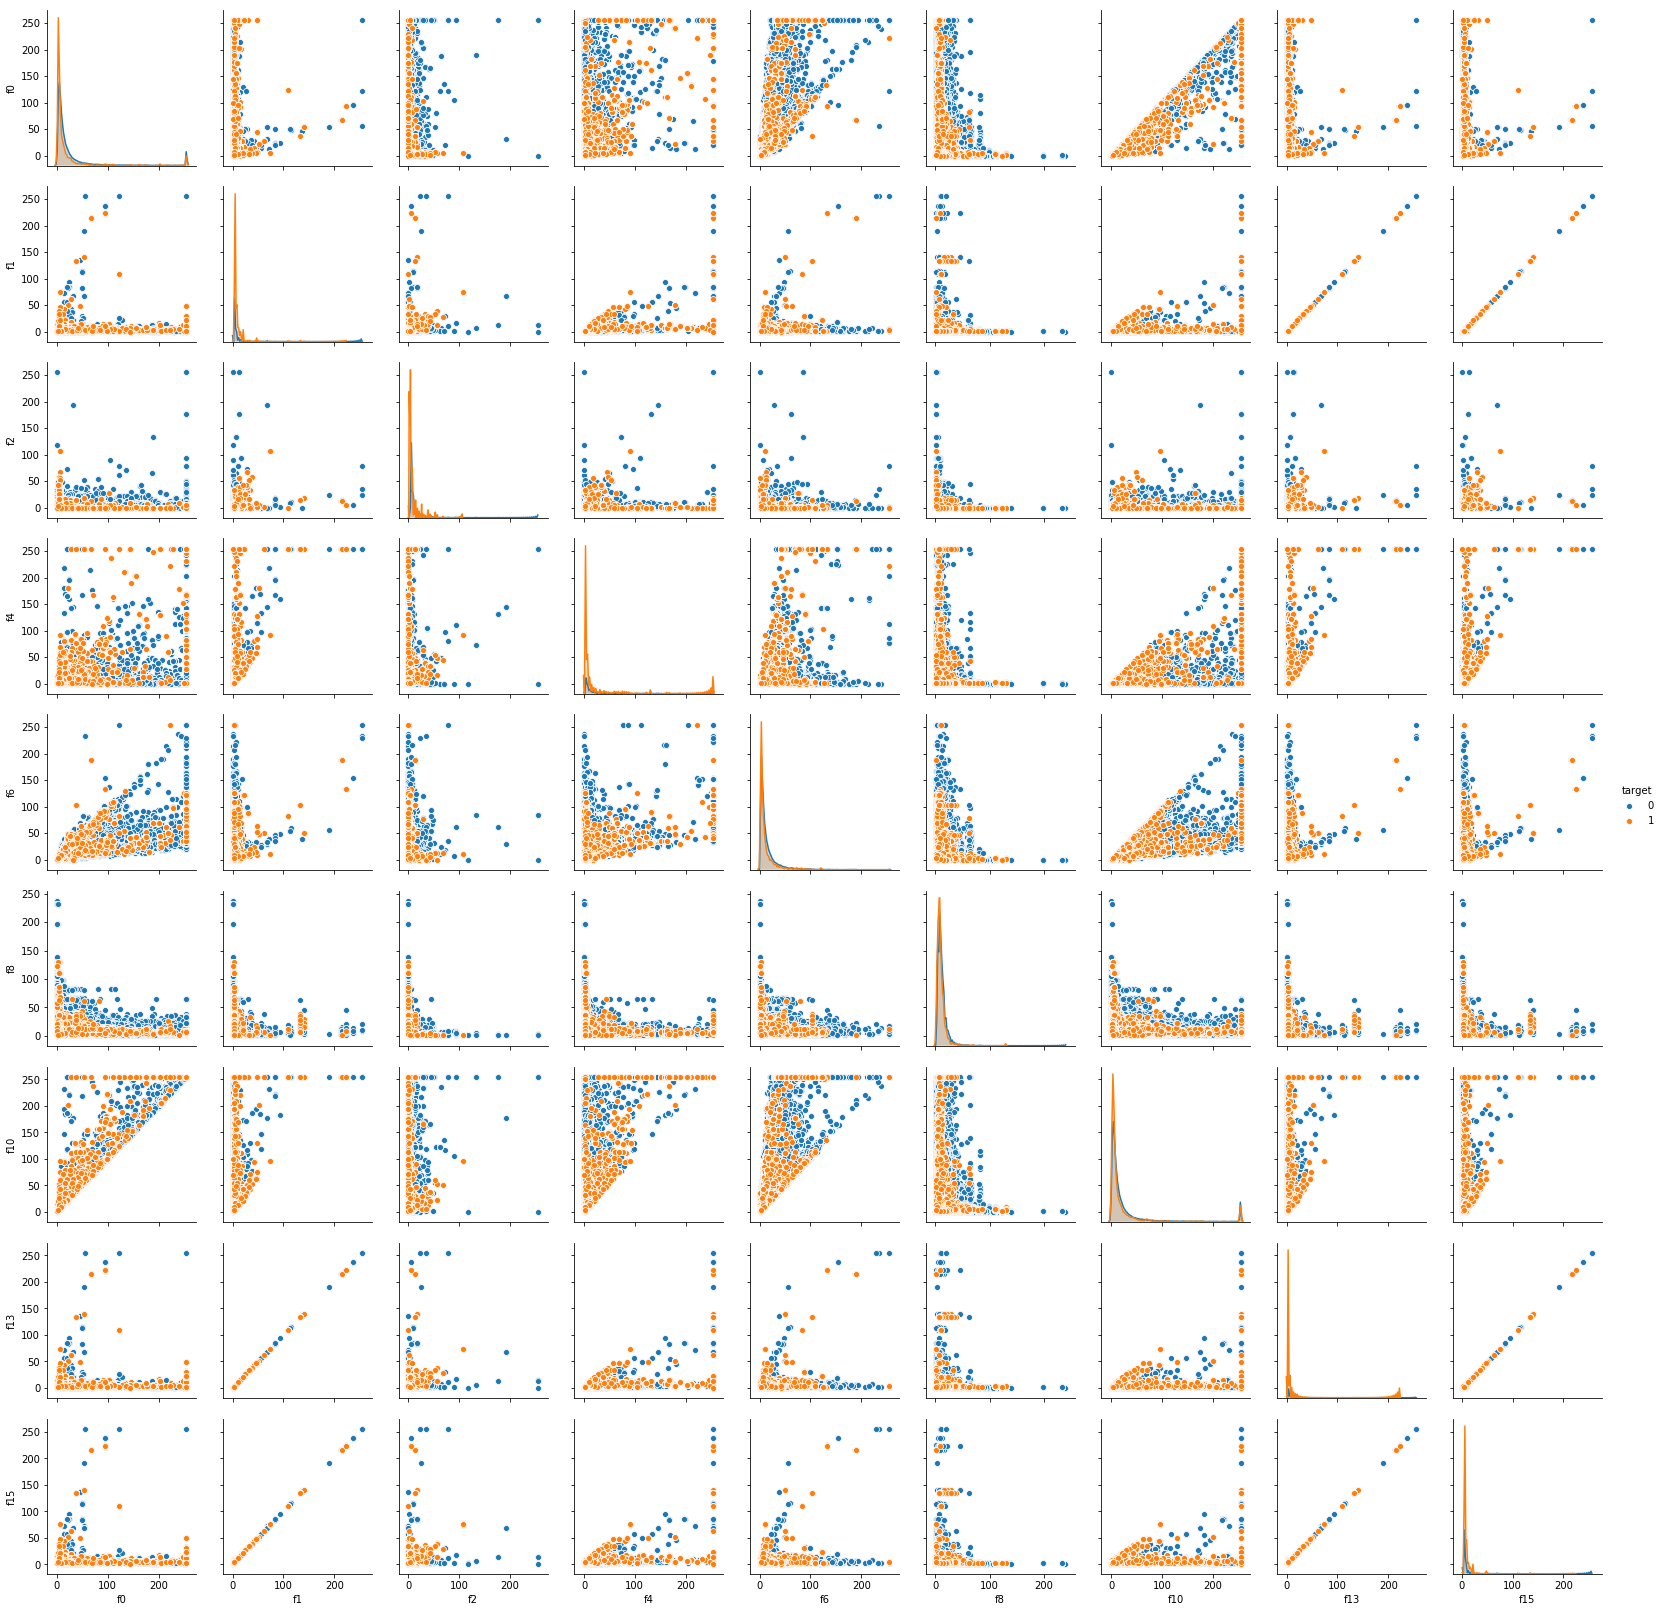

In [ ]:
# Seems like we gotta work on pixels or they are useless
sns.pairplot(data, vars = columns_pixels, hue = 'target')
sns.despine()

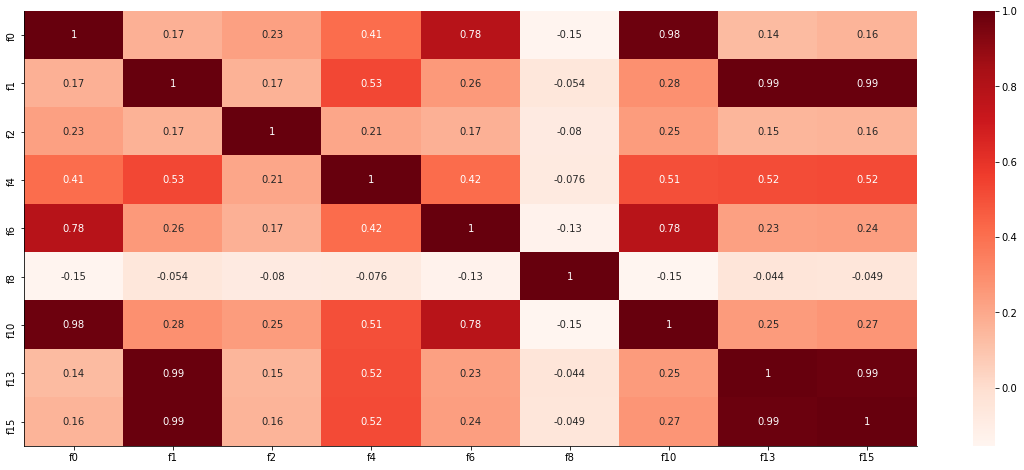

In [31]:
# Lets plot corr map for pixels
fig, ax = plt.subplots(figsize = (20,8))
sns.heatmap(data[columns_pixels].corr(), cmap = 'Reds', annot = True, ax = ax)
sns.despine()

In [32]:
# From this pairplot and corr diagramm we see that f1 and f2, f2 and f10 are good combinations
# and f1, f13, f15 correlates 
zoo = [(DecisionTreeClassifier(max_depth = 10), "Tree")]
zoo_score(data[["target", "f1", "f2", "f3", "f10","f5", "f9", "f11", "f14"]], zoo)

Tree :  0.7696711940584248


In [33]:
# Little bit better, but not much

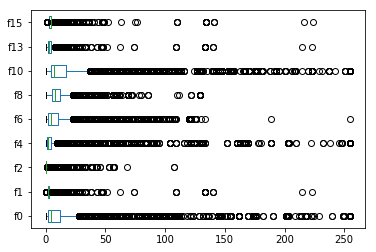

In [34]:
# Lets analize outliers
data[data["target"] == 1][columns_pixels].plot(kind = "box", vert = False)

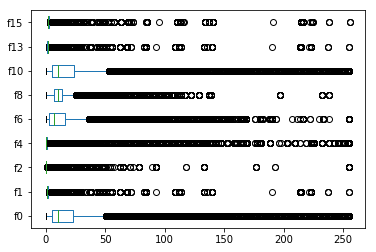

In [35]:
data[data["target"] == 0][columns_pixels].plot(kind = "box", vert = False)

In [36]:
# IQR method
Q1 = data[columns_pixels].quantile(0.25)
Q3 = data[columns_pixels].quantile(0.75)
IQR = Q3 - Q1
# IQR.drop(["target"], axis=0, inplace = True)

In [37]:
data_new = data.copy()
for col in IQR.index:
    data_new.drop(data_new[(data_new[col] > Q3[col] + 1.5*IQR[col]) | (data_new[col] < Q1[col] - 1.5*IQR[col])].index, 
                                                               axis = 0, inplace = True)

In [38]:
Counter(data_new["target"])

Counter({0: 101228, 1: 2280})

In [39]:
# Seems like we deleted a lot of positive class. Probably positive class it this task represented by outliers. Lets see model
zoo = [(DecisionTreeClassifier(max_depth = 10), "Tree")]
zoo_score(data_new[["target", "f1", "f2", "f3","f10","f5", "f9", "f11", "f14"]], zoo)

Tree :  0.6307973268372657


In [40]:
# We lost in score. Lets keep these points
# Lets make final modeling

In [41]:
# Function for undersampling
def make_equal(df0):
    df = df0.copy()
    df1 = df[df['target'] == 1]
    df1 = df1.reset_index(drop = True)
    df2 = df[df['target'] == 0]
    df2 = df2.reset_index(drop = True)
    if len(df2) > len(df1):
        select = np.random.choice(df2.index, size = len(df1))
        return df1.append(df2.iloc[select])
    else:
        select = np.random.choice(df1.index, size = len(df2))
        return df2.append(df1.iloc[select])

In [42]:
train , test = train_test_split(data[["target", "f1", "f2", "f3", "f10","f5", "f9", "f11", "f14"]])
train_undersampled = make_equal(train)
zoo = [(LogisticRegression(), "LR"), 
       (DecisionTreeClassifier(max_depth = 10), "Tree"), 
       (RandomForestClassifier(n_estimators = 10, max_depth = 10), "RF"), 
       (ExtraTreesClassifier(n_estimators = 10, max_depth = 10), "ExtraTrees"), 
       (SVC(), "SVM")]
def select_best(train, zoo):
    X,y = train.iloc[:,1:], train.iloc[:,0]
    score_dict = {}
    for clf, name in zoo:
        score = np.mean(cross_val_score(clf, X, y, cv = 4, scoring = "f1"))
        score_dict[clf] = score
        print(name, "has f1-score: ", score)
    return max(score_dict, key=score_dict.get)

In [43]:
best_model = select_best(train_undersampled, zoo)
X, y = train.iloc[:,1:], train.iloc[:,0]
best_model.fit(X,y)
predict = best_model.predict(test.iloc[:,1:])
print("Final score: ", f1_score(test.iloc[:,0], predict))

c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR has f1-score:  0.888958704086427
Tree has f1-score:  0.9343145324576185
RF has f1-score:  0.9353636619381027
ExtraTrees has f1-score:  0.9048632656385676


c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\vlad nechai\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

SVM has f1-score:  0.9110366423171103
Final score:  0.755029201817002


In [44]:
# With under-sampling method we reduced time needed and also increased f1-score for each model (even LR!!!). Magic :) 
# If we tune parametrs for model we can get even better result